200
{'Date': 'Sat, 26 Nov 2016 10:26:33 GMT', 'X-Frame-Options': 'SAMEORIGIN', 'Content-Type': 'application/json', 'Server': 'WSGIServer/0.1 Python/2.7.12'}


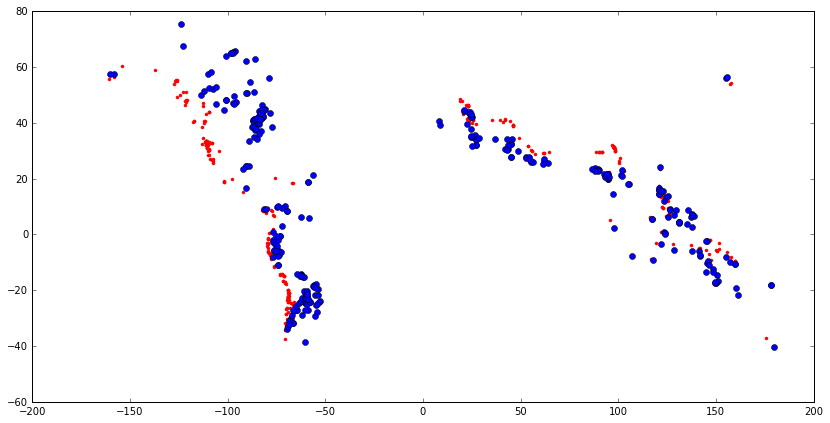

In [5]:
import requests
import json
import geojson
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

proxies = {'http':''}


# Load some point data from a file
# Put the Longitude, Latitude and Age into arrays
ore_deposits = pd.read_csv('/Users/Simon/Data/TimeEncodedData/Yanites+Kesler/ngeo2429-s2.csv',index_col='Deposit number')
longitude_array = np.array(ore_deposits['Long.'])
latitude_array = np.array(ore_deposits['Lat.'])
age_array = np.array(ore_deposits['Age (Ma)'])

# Code to place the points into a geojson feature collection
feature_collection = []
for point in zip(longitude_array,latitude_array,age_array):
    feature = geojson.Feature(geometry=geojson.Point((point[0],point[1])),properties={'age':point[2]})
    feature_collection.append(feature)
tmp = geojson.FeatureCollection(feature_collection)


# Send the request
r = requests.post('http://127.0.0.1:8000/reconstruct_file/test_post/?model=GOLONKA',
                 data=geojson.dumps(tmp, sort_keys=True),
                 proxies=proxies)

# Print some details of the response
print r.status_code
print r.headers
rp = json.loads(r.text)

# Plot the result
plt.figure(figsize=(14,7))
for feature in feature_collection:
    plt.plot(feature['geometry']['coordinates'][0],feature['geometry']['coordinates'][1],'r.')
plt.plot(np.asarray(rp['coordinates'])[:,0],np.asarray(rp['coordinates'])[:,1],'bo')
plt.show()


In [6]:
# example showing submission of two files on native machine,
# we get back a reconstructed gpmlz file
files = {'file1': open('/Users/Simon/GIT/pygplates-alpha/tutorials-sv/Data/LIPs_2014.gpmlz', 'r'),
         'file2': open('/Users/Simon/GIT/pygplates-alpha/tutorials-sv/Data/Seton_etal_ESR2012_2012.1.rot')}

with open('output.gpmlz', 'wb') as handle:
    r = requests.post('http://127.0.0.1:8000/reconstruct_file/test_post_files/',
                     files=files,
                     proxies=proxies,
                     stream=True)

    for block in r.iter_content(1024):
        handle.write(block)



In [7]:
from IPython.core.display import HTML

# Load some point data from a file
# Put the Longitude, Latitude and Age into arrays
ore_deposits = pd.read_csv('/Users/Simon/Data/TimeEncodedData/Yanites+Kesler/ngeo2429-s2.csv',index_col='Deposit number')
longitude_array = np.array(ore_deposits['Long.'])
latitude_array = np.array(ore_deposits['Lat.'])
age_array = np.array(ore_deposits['Age (Ma)'])

# Code to place the points into a geojson feature collection
feature_collection = []
for point in zip(longitude_array,latitude_array,age_array):
    feature = geojson.Feature(geometry=geojson.Point((point[0],point[1])),properties={'age':point[2]})
    feature_collection.append(feature)
tmp = geojson.FeatureCollection(feature_collection)


# Send the request - get subduction parameters at the ore deposit points, at their time of formation
r = requests.post('http://127.0.0.1:8000/reconstruct_file/subduction/',
                 data=geojson.dumps(tmp, sort_keys=True),
                 proxies=proxies)

HTML(r.text)

DistanceToContinent,NearestContinentPID,SeafloorAge,arc_azimuth,arc_length,conv_obliq,conv_rate,lat,lon,migr_obliq,migr_rate,overriding_plate,subducting_plate,time,DepositAge,lat0,lon0
0.000000,202.0,58.181900,104.900020,0.413077,-23.650266,10.879580,-27.142713,-70.693933,148.853505,1.868306,201.0,911.0,6.0,5.50,-27.37100,-66.2800
0.000000,2901.0,60.873780,96.038590,0.484320,-15.910290,12.334073,-31.929292,-70.382638,177.468902,2.515286,201.0,911.0,12.0,12.00,-30.50000,-69.7500
0.000000,202.0,68.657997,104.923834,0.413077,-22.790380,11.302473,-27.042763,-70.337328,158.492736,2.139703,201.0,911.0,8.0,8.50,-27.26700,-66.6500
0.000000,202.0,68.657997,104.923834,0.413077,-22.790380,11.302473,-27.042763,-70.337328,158.492736,2.139703,201.0,911.0,8.0,7.50,-27.33000,-66.6090
0.000000,202.0,66.457466,104.911541,0.413077,-23.217152,11.090426,-27.092476,-70.515511,154.005234,1.996854,201.0,911.0,7.0,7.00,-27.40000,-66.5500
0.000000,202.0,68.657997,104.923834,0.413077,-22.790380,11.302473,-27.042763,-70.337328,158.492736,2.139703,201.0,911.0,8.0,8.00,-27.28300,-66.5670
0.000000,202.0,66.517698,104.861433,0.413077,-28.658396,12.735047,-27.343584,-69.122097,168.579369,2.585878,201.0,911.0,14.0,14.00,-26.30000,-67.9000
71.958638,28011.0,0.318414,94.740327,0.325936,27.505927,2.972462,-50.821415,-74.603363,-179.316249,2.041501,819.0,802.0,13.0,13.00,-31.95000,-70.0500
0.000000,202.0,66.420971,104.706860,0.413077,-30.427576,12.930797,-26.557504,-68.624194,168.762642,2.595622,201.0,911.0,15.0,15.00,-25.14400,-66.7630
0.000000,202.0,45.898673,95.839873,0.484320,-15.072480,10.448940,-29.364128,-71.558695,156.198799,1.817189,201.0,911.0,4.0,4.40,-29.00000,-67.7500


200
{'Date': 'Sat, 26 Nov 2016 10:54:10 GMT', 'X-Frame-Options': 'SAMEORIGIN', 'Content-Type': 'application/json', 'Server': 'WSGIServer/0.1 Python/2.7.12'}


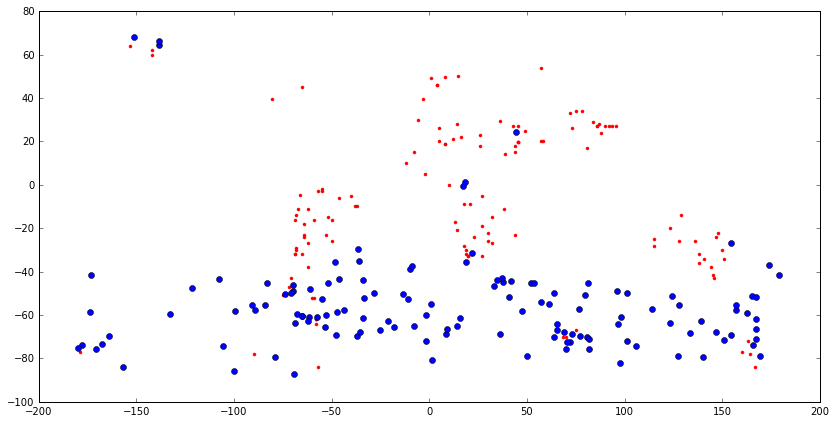

In [19]:
import requests
import json
import geojson
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
import pandas as pd

%matplotlib inline

proxies = {'http':''}


# Load some point data from a file
# Put the Longitude, Latitude and Age into arrays
paleo_lith = pd.read_csv('/Users/Simon/GIT/gplates-web/django/GWS/DATA/PALEO/Boucot_paleolithology.csv')

paleo_lith_subset = paleo_lith[paleo_lith.LithCode=='T']

longitude_array = np.array(paleo_lith_subset.X)
latitude_array = np.array(paleo_lith_subset.Y)
age_array = np.mean((paleo_lith_subset.TOAGE,paleo_lith_subset.FROMAGE),axis=0)

# Code to place the points into a geojson feature collection
feature_collection = []
for point in zip(longitude_array,latitude_array,age_array):
    feature = geojson.Feature(geometry=geojson.Point((point[0],point[1])),properties={'age':point[2]})
    feature_collection.append(feature)
tmp = geojson.FeatureCollection(feature_collection)


# Send the request
r = requests.post('http://127.0.0.1:8000/reconstruct_file/test_post/?model=GOLONKA',
                 data=geojson.dumps(tmp, sort_keys=True),
                 proxies=proxies)

# Print some details of the response
print r.status_code
print r.headers
rp = json.loads(r.text)

# Plot the result
plt.figure(figsize=(14,7))
for feature in feature_collection:
    plt.plot(feature['geometry']['coordinates'][0],feature['geometry']['coordinates'][1],'r.')
plt.plot(np.asarray(rp['coordinates'])[:,0],np.asarray(rp['coordinates'])[:,1],'bo')
plt.show()

